In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from model_evaluation_methods import *
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
from sklearn.model_selection import cross_val_score

df = pd.read_csv('cleaned_cancer.csv')
df = df.drop(['index', 'Patient Id'], axis=1)


X = df.drop('Level', axis=1)
y = df['Level']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
params = {
    'max_depth': 3,
    'eta': 0.1,
     'objective': 'multi:softmax',
    'num_class': 3
}
num_round = 100


In [12]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


Xgb model Evaluation for Feature Selection:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


c:\Python38\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


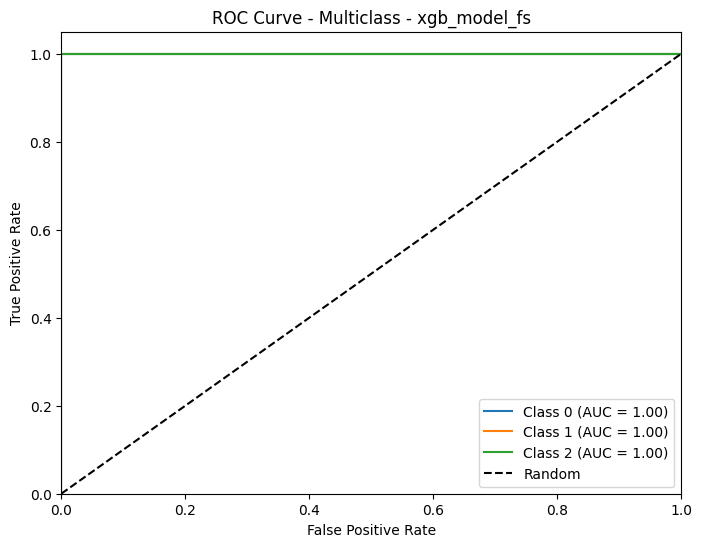

Training vs Testing Accuracy Comparison:
Feature Selection - Training Accuracy: 1.0 Testing Accuracy: 1.0
Cross-Validation Scores:
Feature Selection - Mean CV Accuracy: 1.0


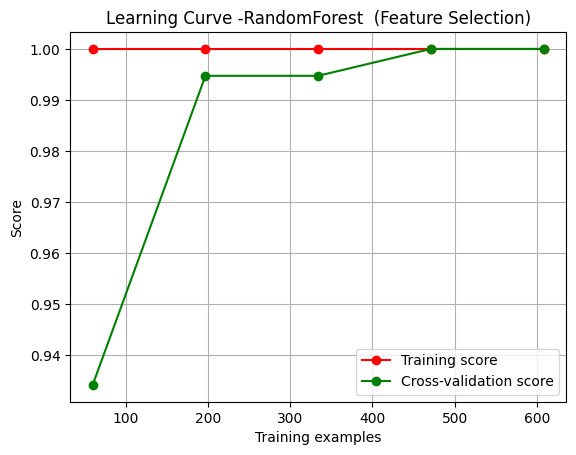

In [13]:
selector = SelectKBest(score_func=chi2, k=10)  
X_train_selected = selector.fit_transform(X_train, y_train_encoded)
X_test_selected = selector.transform(X_test)

xgb_model_fs = XGBClassifier(params, num_round,random_state=42)
xgb_model_fs.fit(X_train_selected, y_train_encoded)
y_pred_fs = xgb_model_fs.predict(X_test_selected)

conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_fs)
error_rate_fs = calculate_error_rate(conf_matrix_fs)
sensitivity_fs, precision_fs, f_measure_fs = calculate_metrics(y_test_encoded,y_pred_fs)
accuracy_fs = accuracy_score(y_test_encoded, y_pred_fs)

print("\nXgb model Evaluation for Feature Selection:")
print("Accuracy:", accuracy_fs)
print("Error Rate:", error_rate_fs)
print("Precision:", precision_fs)
print("F-measure:", f_measure_fs)

plot_roc_curve_multiclass(y_test_encoded, xgb_model_fs.predict_proba(X_test_selected), xgb_model_fs.classes_,'xgb_model_fs')

y_train_pred_fs = xgb_model_fs.predict(X_train_selected)

train_accuracy_fs = accuracy_score(y_train, y_train_pred_fs)

print("Training vs Testing Accuracy Comparison:")

print("Feature Selection - Training Accuracy:", train_accuracy_fs, "Testing Accuracy:", accuracy_fs)

cv_scores_fs = cross_val_score(xgb_model_fs, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")

print("Feature Selection - Mean CV Accuracy:", np.mean(cv_scores_fs))

plot_learning_curve(xgb_model_fs, "Learning Curve -RandomForest  (Feature Selection)", X_train_selected, y_train)

plt.show()

c:\Python38\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



Xgb model Evaluation for PCA:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


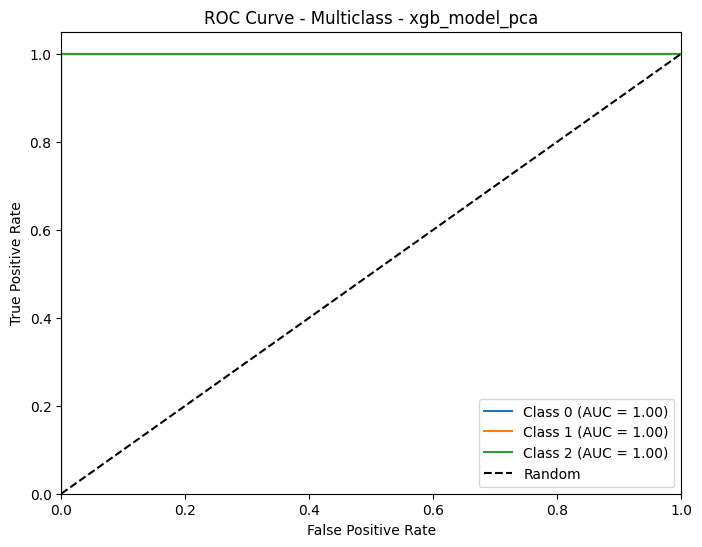

Training vs Testing Accuracy Comparison:
Feature Selection - Training Accuracy: 1.0 Testing Accuracy: 1.0
PCA - Mean CV Accuracy: 0.9973684210526315


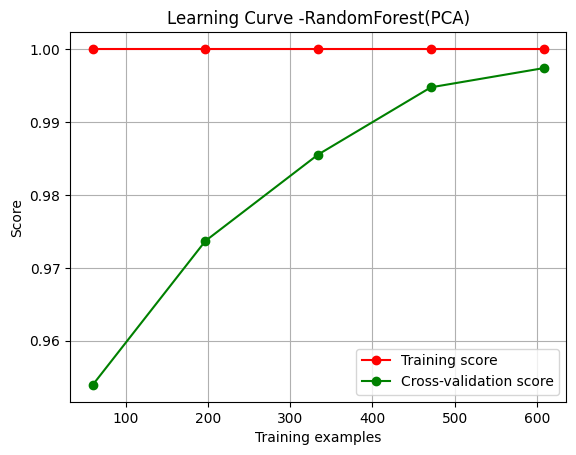

In [14]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

xgb_model_pca = XGBClassifier(params, num_round,random_state=42)
xgb_model_pca.fit(X_train_pca, y_train_encoded)
y_pred_pca = xgb_model_pca.predict(X_test_pca)

conf_matrix_pca = confusion_matrix(y_test_encoded, y_pred_pca)
error_rate_pca = calculate_error_rate(conf_matrix_pca)
sensitivity_pca, precision_pca, f_measure_pca = calculate_metrics(y_test_encoded,y_pred_pca)
accuracy_pca = accuracy_score(y_test_encoded, y_pred_pca)

print("\nXgb model Evaluation for PCA:")
print("Accuracy:", accuracy_pca)
print("Error Rate:", error_rate_pca)
print("Precision:", precision_pca)
print("F-measure:", f_measure_pca)

plot_roc_curve_multiclass(y_test_encoded, xgb_model_pca.predict_proba(X_test_pca), xgb_model_pca.classes_,'xgb_model_pca')

y_train_pred_pca = xgb_model_pca.predict(X_train_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)

print("Training vs Testing Accuracy Comparison:")

print("Feature Selection - Training Accuracy:", train_accuracy_fs, "Testing Accuracy:", accuracy_fs)

cv_scores_pca = cross_val_score(xgb_model_pca, X_train_pca, y_train, cv=5, scoring='accuracy')

print("PCA - Mean CV Accuracy:", np.mean(cv_scores_pca))

plot_learning_curve(xgb_model_pca, "Learning Curve -RandomForest(PCA)", X_train_pca, y_train)

plt.show()


c:\Python38\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



Xgb model Evaluation for Full Dataset:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
F-measure: 1.0


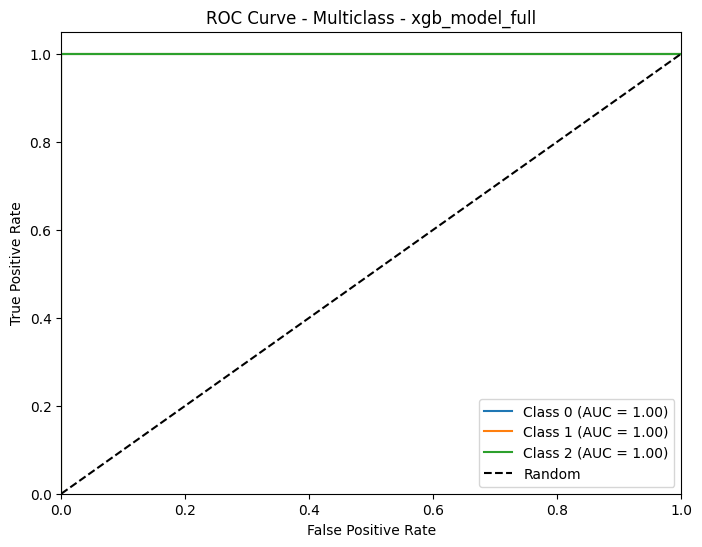

Training vs Testing Accuracy Comparison:
Full Dataset - Training Accuracy: 1.0 Testing Accuracy: 1.0
Full Dataset - Mean CV Accuracy: 1.0


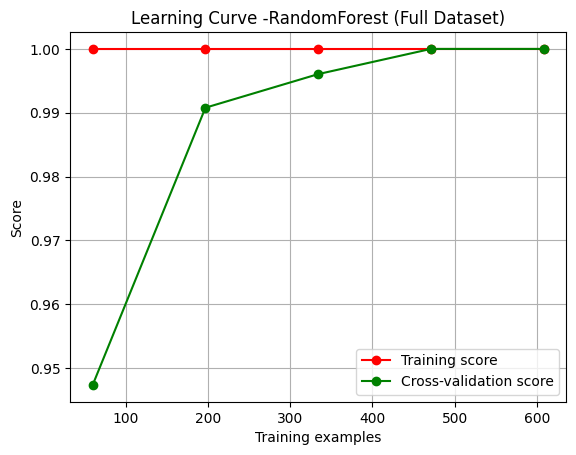

In [15]:
xgb_model_full = XGBClassifier(params, num_round,random_state=42)
xgb_model_full.fit(X_train, y_train_encoded)
y_pred_full = xgb_model_full.predict(X_test)

conf_matrix_full = confusion_matrix(y_test_encoded, y_pred_full)
error_rate_full = calculate_error_rate(conf_matrix_full)
sensitivity_full, precision_full, f_measure_full = calculate_metrics(y_test_encoded,y_pred_full)
accuracy_full = accuracy_score(y_test_encoded, y_pred_full)

print("\nXgb model Evaluation for Full Dataset:")
print("Accuracy:", accuracy_full)
print("Error Rate:", error_rate_full)
print("Precision:", precision_full)
print("F-measure:", f_measure_full)

plot_roc_curve_multiclass(y_test_encoded, xgb_model_full.predict_proba(X_test), xgb_model_full.classes_,'xgb_model_full')

y_train_pred_full = xgb_model_full.predict(X_train)

train_accuracy_full = accuracy_score(y_train, y_train_pred_full)

print("Training vs Testing Accuracy Comparison:")

print("Full Dataset - Training Accuracy:", train_accuracy_full, "Testing Accuracy:", accuracy_full)

cv_scores_full = cross_val_score(xgb_model_full, X_train, y_train, cv=5, scoring='accuracy')

print("Full Dataset - Mean CV Accuracy:", np.mean(cv_scores_full))

plot_learning_curve(xgb_model_full, "Learning Curve -RandomForest (Full Dataset)", X_train, y_train)

plt.show()